<h1>Импортируем нужные модули. Выводим таблицу.</h1>

In [1]:
import pandas as pd
import numpy as np
file_path = 'dz2.csv'
df = pd.read_csv(file_path)
df.head()

,Отметка времени,Итоговая оценка за экзамен по ТОЭ,"С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)","Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?",Оценка по физике в школе,Оценка по физике в последнем семестре?,Оценка за ИДЗ по ТОЭ за семестр,Оценка по лабораторным ТОЭ,Вели конспект по занятиям? (лекции и/или практики),Выходили к доске на практике?,...,В течении предыдущего семестра были трудоустроены и/или проходили стажировку?,"Если работали/проходили стажировку, то какая ставка (загрузка):",Где проживаете?,"Есть кот дома? (в месте, где сейчас живете)",Есть родной брат/сестра?,Гражданство,Сколько в среднем играли в прошлом семестре? Укажите число в часах,Была ли стипендия в 3 семестре?,Оцените свое ментальное здоровье в прошлом семестре,"Оцените, насколько были истощены (уставши) к началу сессии"
0,2024/09/30 11:51:10 PM GMT+3,5.0,1.0,75,5,5.0,5.0,5.0,да,да,...,нет,0.00,общежитие 8,нет,да,KAZ,10,да,9,1
1,2024/09/30 11:53:32 PM GMT+3,3.0,1.0,75,4,5.0,4.0,5.0,да,нет,...,нет,0.00,дома,нет,да,RUS,20,нет,7,6
2,2024/09/30 11:53:33 PM GMT+3,3.0,1.0,75,5,4.0,5.0,5.0,да,нет,...,да,0.25,дома,да,да,RUS,168,да,7,3
3,2024/09/30 11:57:50 PM GMT+3,3.0,1.0,75,5,4.0,4.0,4.0,нет,нет,...,да,0.50,общежитие 8,нет,да,KAZ,18,нет,7,2
4,2024/09/30 11:59:56 PM GMT+3,4.0,1.0,100,4,3.0,4.0,5.0,нет,нет,...,нет,NaN,дома,нет,да,RUS,20,нет,10,5


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pickle

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<h1>Редактируем таблицу для дальнейшей работы с ней</h1>

Заменяем все значения Да/Нет на 1/0. Меняем все значения на тип float. Удаляем ненужный столбец отметка времени. Удаляем столбцы с типом object. 

In [7]:
df = df.replace({'да': 1, 'нет': 0})

In [8]:
df = df.astype(float, errors='ignore')

In [9]:
df = df.drop('Отметка времени', axis=1)

In [10]:
df = df.drop('Гражданство', axis=1)

In [11]:
df = df.drop('Где проживаете?', axis=1)

In [12]:
df = df.drop('Сколько в среднем играли в прошлом семестре? Укажите число в часах', axis=1)

Заменяем названия столбцов на короткие для удобства работы с таблицей. 

In [13]:
columns = df.columns
columns = ['итог', 'попытки', 'посещение', 'оценка в школе', 'оценка за сем', 'оценка идз', 
           'оценка лабы', 'конспект', 'выход к доске', 'оценка за кр', 'трудоустроимость', 
           'ставка', 'кот', 'брат/сестра', 'стипендия', 'менталка', 'истощенность']
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   итог              34 non-null     float64
 1   попытки           34 non-null     float64
 2   посещение         35 non-null     float64
 3   оценка в школе    35 non-null     float64
 4   оценка за сем     34 non-null     float64
 5   оценка идз        34 non-null     float64
 6   оценка лабы       34 non-null     float64
 7   конспект          35 non-null     float64
 8   выход к доске     35 non-null     float64
 9   оценка за кр      35 non-null     float64
 10  трудоустроимость  35 non-null     float64
 11  ставка            29 non-null     float64
 12  кот               35 non-null     float64
 13  брат/сестра       35 non-null     float64
 14  стипендия         34 non-null     float64
 15  менталка          35 non-null     float64
 16  истощенность      35 non-null     float64
dtyp

In [14]:
df = df.fillna(0.0)

<h1>Корреляционная матрица.</h1>

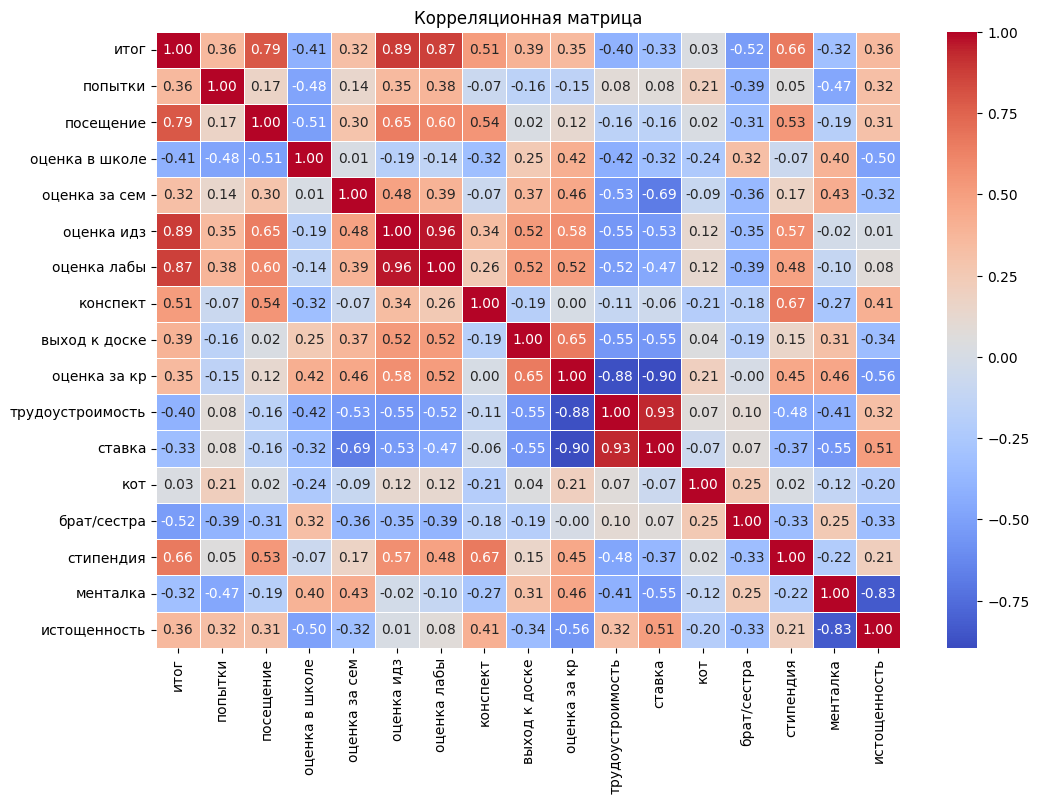

In [15]:
c_m = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(c_m.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Можно заметить, что столбцы с трудоустроимостью, ставкой, брат/сестра, с количествами попыток сдать экзамен, с котом, с менталкой и оценкой в школе практически не влияет на итоговую оценку за семестр. Поэтому удалим эти столбцы, поскольку далее они никак не будут влиять на прогнозирование.

In [16]:
df = df.drop(columns=['трудоустроимость', 'ставка', 'кот', 'брат/сестра', 'попытки', 'менталка', 'оценка в школе'])

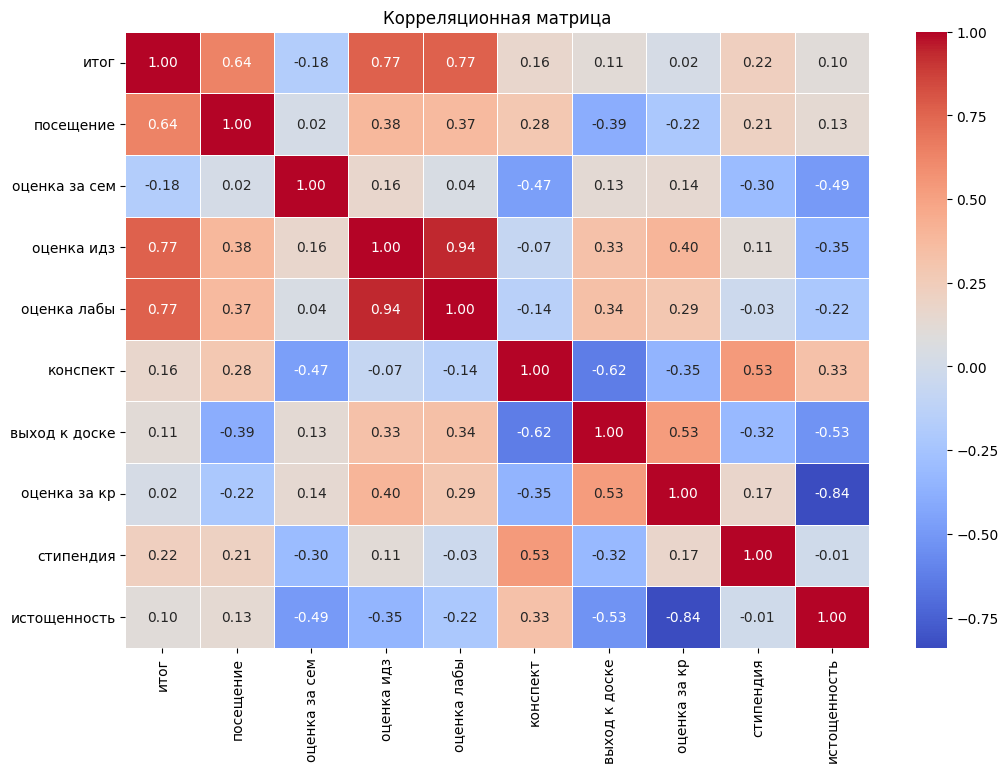

In [17]:
c_m = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(c_m.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Отметит, что оценка за идз и за лабораторную работу влияют на итог. Поэтому создадим модель и посмотрим, насколько сильно влияет эти факторы.

<h1>Модель: оценка ошибок и визуализация</h1>

In [18]:
X = df[['оценка лабы', 'оценка идз']]
y = df['итог']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 0.98
R-squared: 0.55
